<center>
<![image.png](attachment:image.png)>
<img src="https://scontent.flis7-1.fna.fbcdn.net/v/t39.30808-6/327345211_708012977623591_5371889953719216000_n.png?_nc_cat=104&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeGA4Epi5DPgQWGmwJnzDzYwlTHqnE4dPp2VMeqcTh0-ndnVzTPGmZ1C7LYJvEsh0wc&_nc_ohc=eYml-GYudcEAX9U9ExD&_nc_ht=scontent.flis7-1.fna&oh=00_AfAgCk0A9S9vX7079OukWAoqEYq0-hGrKIHFbkcpZIhmpA&oe=6535741F" width="570" height="250"/></left>
<h1><center><font size=8>Analysing papers from Scopus</center></font></h1>
<h1><center>Pre-Processing </center></h1>
________________________________________________________________________________________________________

# Installing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import itertools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



4. Data Transformation
Normalization: Scale numerical features like 'Year', 'Citation count' to bring them into a similar range.
Aggregation: If you're interested in author-level or journal-level metrics, aggregate the data accordingly.

5. Data Split
Train-Test Split: Divide the data into training and test sets for model evaluation.

6. Save Preprocessed Data
Save the preprocessed data into a new CSV file or a different format suitable for machine learning algorithms.
Python Libraries You Can Use
Pandas: For data manipulation and cleaning.
NLTK or SpaCy: For text preprocessing.
Scikit-learn: For feature engineering and machine learning models

# Loading Data

In [47]:
# Load the CSV file into a DataFrame
df = pd.read_csv('scopus.csv')


## Understanding the dataset

In [48]:
# Checking the shape of the dataset
df.shape

(354, 46)

In [49]:
# View the first 5 rows of the dataset
df.head(3)

Authors  \
0                                   Quick M.; Law J.   
1  Ismail Z.; Ahmad W.I.W.; Hamjah S.H.; Astina I.K.   
2                      Luo J.; Li Q.; Li B.; Wang S.   

                                   Author full names  \
0  Quick, Matthew (55111187500); Law, Jane (93373...   
1  Ismail, Zainab (57215491731); Ahmad, Wan Ibrah...   
2  Luo, Jing (55482603200); Li, Qingqing (5760845...   

                                        Author(s) ID  \
0                            55111187500; 9337382100   
1  57215491731; 55214752000; 57214988277; 5720847...   
2  55482603200; 57608452900; 57610048700; 5760685...   

                                               Title  Year  \
0  Analyzing the influence of ethnic composition ...  2015   
1          The impact of population ageing: A review  2021   
2  Research on City Area Traffic Generation Analy...  2021   

                                     Source title Volume Issue Art. No.  \
0      Advances in Geographic Information Science     19   NaN      NaN   
1                Iranian Journal of Public Health     50    12      NaN   
2  ACM International Conference Proceeding Series    NaN   NaN      NaN   

  Page start  ...             ISBN  CODEN  PubMed ID  \
0        227  ...  978-331919949-8    NaN        NaN   
1       2451  ...              NaN    NaN        NaN   
2        493  ...  978-145038497-1    NaN        NaN   

  Language of Original Document   Abbreviated Source Title     Document Type  \
0                       English      Adv. Geogr. inf. Sci.  Conference paper   
1                       English     Iran. J. Public Health            Review   
2                       English  ACM Int. Conf. Proc. Ser.  Conference paper   

  Publication Stage Open Access  Source                 EID  
0             Final         NaN  Scopus  2-s2.0-84947224211  
1             Final         NaN  Scopus  2-s2.0-85120179088  
2             Final         NaN  Scopus  2-s2.0-85128659284  

[3 rows x 46 columns]

In [6]:
# View the last five rows of the dataset
df.tail(5)

Authors  \
349            Castro L.J.; Rogers A.   
350                        Rachidi M.   
351                          Unger K.   
352  Konstantinov O.A.; Yepikhin A.A.   
353              KING R.; STRACHAN A.   

                                     Author full names  \
349  Castro, L.J. (7202228706); Rogers, A. (7402817...   
350                           Rachidi, M. (7003775364)   
351                          Unger, Klaus (7102245202)   
352  Konstantinov, O.A. (7006565911); Yepikhin, A.A...   
353  KING, RUSSELL (7404499853); STRACHAN, ALAN (70...   

               Author(s) ID  \
349  7202228706; 7402817132   
350              7003775364   
351              7102245202   
352  7006565911; 6508170237   
353  7404499853; 7005363089   

                                                 Title  Year  \
349  What the age composition of migrants can tell us.  1983   
350  Some practical problems arising from the use o...  1976   
351  Regional characteristics affecting Greek migra...  1981   
352         Some shifts in the population of the USSR.  1981   
353                    PATTERNS OF SARDINIAN MIGRATION  1980   

                                          Source title Volume Issue Art. No.  \
349          Population bulletin of the United Nations    NaN    15      NaN   
350                                      Jimlar mutane      1     2      NaN   
351          European Demographic Information Bulletin     12     3      NaN   
352           Soviet Geography: Review and Translation     22     7      NaN   
353  Tijdschrift voor economische en sociale geografie     71     4      NaN   

    Page start  ... ISBN  CODEN   PubMed ID Language of Original Document  \
349         63  ...  NaN    NaN  12265834.0                       English   
350         88  ...  NaN    NaN  12264830.0                        French   
351        101  ...  NaN    NaN  12265186.0                       English   
352        407  ...  NaN    NaN  12265185.0                       English   
353        209  ...  NaN    NaN  12263221.0                       English   

                      Abbreviated Source Title Document Type  \
349                              Popul Bull UN       Article   
350                              Jimlar Mutane       Article   
351  European Demographic Information Bulletin       Article   
352                                        NaN       Article   
353                Tijdschr. Econ. Soc. Geogr.       Article   

    Publication Stage Open Access  Source                EID  
349             Final         NaN  Scopus  2-s2.0-0020875491  
350             Final         NaN  Scopus  2-s2.0-0016995120  
351             Final         NaN  Scopus  2-s2.0-0019727955  
352             Final         NaN  Scopus  2-s2.0-0019615367  
353             Final         NaN  Scopus  2-s2.0-0019227844  

[5 rows x 46 columns]

In [50]:
# Get information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        335 non-null    object 
 1   Author full names              335 non-null    object 
 2   Author(s) ID                   335 non-null    object 
 3   Title                          354 non-null    object 
 4   Year                           354 non-null    int64  
 5   Source title                   354 non-null    object 
 6   Volume                         308 non-null    object 
 7   Issue                          301 non-null    object 
 8   Art. No.                       43 non-null     object 
 9   Page start                     311 non-null    object 
 10  Page end                       304 non-null    object 
 11  Page count                     296 non-null    float64
 12  Cited by                       354 non-null    int

# **1. Data Cleaning**
Remove Duplicates: Ensure that there are no duplicate entries.
Handle Missing Values: Decide how to handle missing data. You could either remove such entries or fill them in with a default value.
Standardize Text: Convert all text to lowercase, remove special characters, etc.


In [51]:
# Get descriptive stats about the df
df.describe().T

count          mean           std        min         25%  \
Year             354.0  1.997362e+03  1.441923e+01     1972.0      1986.0   
Page count       296.0  1.708784e+01  2.216668e+01        1.0         8.0   
Cited by         354.0  1.574859e+01  5.318487e+01        0.0         0.0   
Tradenames         0.0           NaN           NaN        NaN         NaN   
Manufacturers      0.0           NaN           NaN        NaN         NaN   
Conference code   13.0  1.459525e+05  3.120628e+04    88752.0    122383.0   
PubMed ID        288.0  1.441808e+07  6.866185e+06  1628712.0  12267854.5   

                        50%          75%         max  
Year                 1992.0      2013.75      2023.0  
Page count             13.0        21.00       325.0  
Cited by                3.5        14.00       837.0  
Tradenames              NaN          NaN         NaN  
Manufacturers           NaN          NaN         NaN  
Conference code    148036.0    174235.00    187924.0  
PubMed ID        12314270.5  12345793.50  36652472.0

In [52]:
# Checking for duplicate values
df.duplicated().sum()

0

In [53]:
# Checking for missing values
df.isna().sum()

Authors                           19
Author full names                 19
Author(s) ID                      19
Title                              0
Year                               0
Source title                       0
Volume                            46
Issue                             53
Art. No.                         311
Page start                        43
Page end                          50
Page count                        58
Cited by                           0
DOI                              135
Link                               0
Affiliations                     155
Authors with affiliations        155
Abstract                           0
Author Keywords                  262
Index Keywords                     8
Molecular Sequence Numbers       353
Chemicals/CAS                    344
Tradenames                       354
Manufacturers                    354
Funding Details                  280
Funding Texts                    290
References                       177
C

In [54]:
# Get the number of duplicates
duplicate = df['Abstract'].duplicated().sum()
duplicate

33

In [55]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Abstract'])
df.shape


(321, 46)

# **2. Text Preprocessing**
For Abstracts, Titles, Keywords
Tokenization: Break down text into words, phrases, symbols, or other meaningful elements.
Stopword Removal: Remove common words that may not add much meaning in text analysis.
Stemming/Lemmatization: Reduce words to their root form.
For Categorical Data (e.g., Author names, Affiliations, Source title)
Encoding: Convert categories into integers or one-hot encoded vectors.
The clean_text function you've provided aims to perform a series of text preprocessing steps on a given text string (df, which is a bit misleading as it's usually used to denote a DataFrame). These steps include:
The contractions library in Python is used for expanding English contractions. A contraction is a shortened form of one or two words (one of which is usually a verb). For example, "can't" is a contraction for "cannot," and "I'll" is a contraction for "I will" or "I shall."
- Removing URLs
- Removing HTML tags
- Removing punctuations
- Converting text to lowercase
- Removing stopwords
- Applying a custom list of stopwords
- Removing extra whitespaces
- Tokenizing the text
- Removing numbers
- Lemmatizing the text
- Stemming the text
- Fixing contractions

**Import Statements:** Make sure to import all the necessary modules and packages at the beginning of your script, such as re for regular expressions, nltk for stopwords and tokenization, and WordNetLemmatizer for lemmatization.

- #import re
- #from nltk.corpus import stopwords
- #from nltk.tokenize import word_tokenize
- #from nltk.stem import WordNetLemmatizer
- #import contractions

In [56]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "use", "user", "using", "usable"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [57]:
#converts all the values in a specific columns of the DataFrame data to strings
df["Abstract"] = df["Abstract"].astype(str)

#Applying a Text Cleaning Function
df['clean_Abstract'] = df['Abstract'].apply(clean_text)

In [58]:
#... aims to create a new DataFrame called selected_columns that contains only the "Abstract" and "clean_Abstract" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = df[['Abstract', 'clean_Abstract']]
selected_columns.head(20)


Abstract  \
0   The spatial distribution of violent crime is i...   
1   Background: Population aging refers to the inc...   
2   City area traffic demand analysis is an import...   
3   Wuchereria bancrofti (Wb) is the most widely d...   
4   Background:Migration has long been understood ...   
5   Density-dependent emigration has been recogniz...   
6   This study initiates a methodological critique...   
7   Population migration is an essential medium fo...   
8   Population mobility affected the spread and ri...   
9   Background: Studies investigating the populati...   
10  Human movement plays a key role in economies a...   
11  Data sets from three laboratories conducting s...   
12  Knowledge spillover and capital agglomeration ...   
13  Fine-scale population datasets are essential t...   
14  The purpose of this paper is to find out the b...   
15  The Internet contains a great wealth of inform...   
16  The area lies in arid zone of western Rajastha...   
17  The analysis of the evolution of population py...   
18  As children with refugee backgrounds continue ...   
19  Objective: To assess the effect of rural-to-ur...   

                                       clean_Abstract  
0   peripheri increas heterogen resid provid viole...  
1   nowaday popul growth care around pattern polic...  
2   factor take popul heyuan attract model paper a...  
3   take wuchereria evolutionari bv malayi wide po...  
4   factor popul long migrant evid associ import r...  
5   densitydepend emigr bv popul probabl function ...  
6   find popul recommend growth depend model polic...  
7   factor describ find popul challeng track persp...  
8   inflow popul connect coeffici includ geograph ...  
9   assess find popul abstract nation correspond s...  
10  detail popul kenya wide long pattern nation mo...  
11  assess western common challeng model archiv ex...  
12  inflow construct popul impact improv exhibit g...  
13  dailyaverag countylevel popul covari includ ge...  
14  signific integr experi provid interact popul s...  
15  popul requir household includ person great int...  
16  factor predict base effluent variat wastewat p...  
17  sciencebusi municip emigr wide popul accur too...  
18  increas context enrol distant educ predominant...  
19  sweet kenya household show diet area migrant y...

In [59]:
print(df[['Abstract', 'clean_Abstract']].head(2).to_string(max_colwidth=100))


                                                                                              Abstract                                                                                       clean_Abstract
0  The spatial distribution of violent crime is influenced by small-area characteristics. The socia...  peripheri increas heterogen resid provid violent characterist includ concentr dimens rate crime ...
1  Background: Population aging refers to the increase in number and percentage of older population...  nowaday popul growth care around pattern polici paper youth method phenomenon relat variou migra...


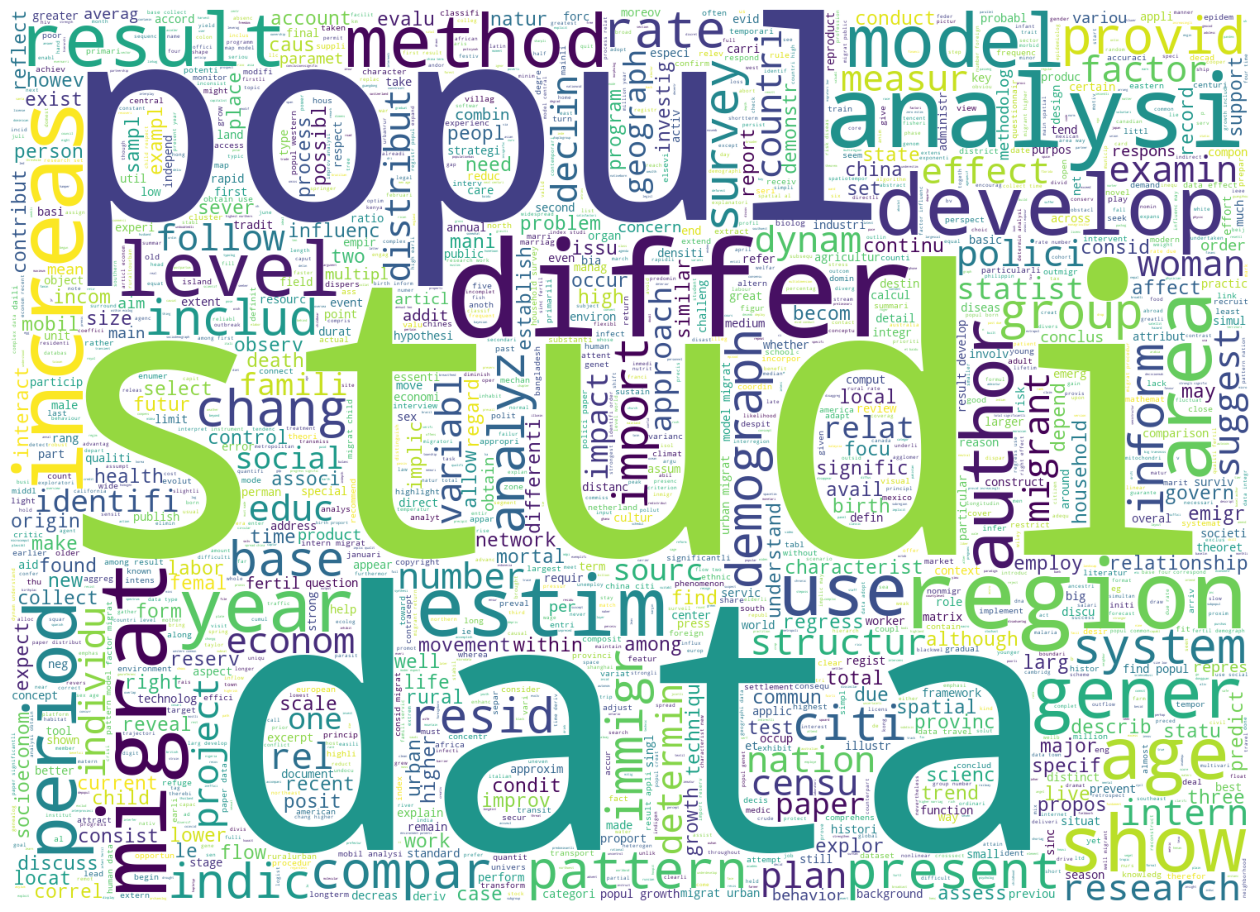

In [60]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(df["clean_Abstract"]))
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [61]:
stopwords_abs = []  # Initialize the list

# Adding some of the words to the stopwords list
stopwords_to_remove = ['provide', 'approach', 'analysis']
stopwords_abs.extend(stopwords_to_remove)  # Now you can extend it

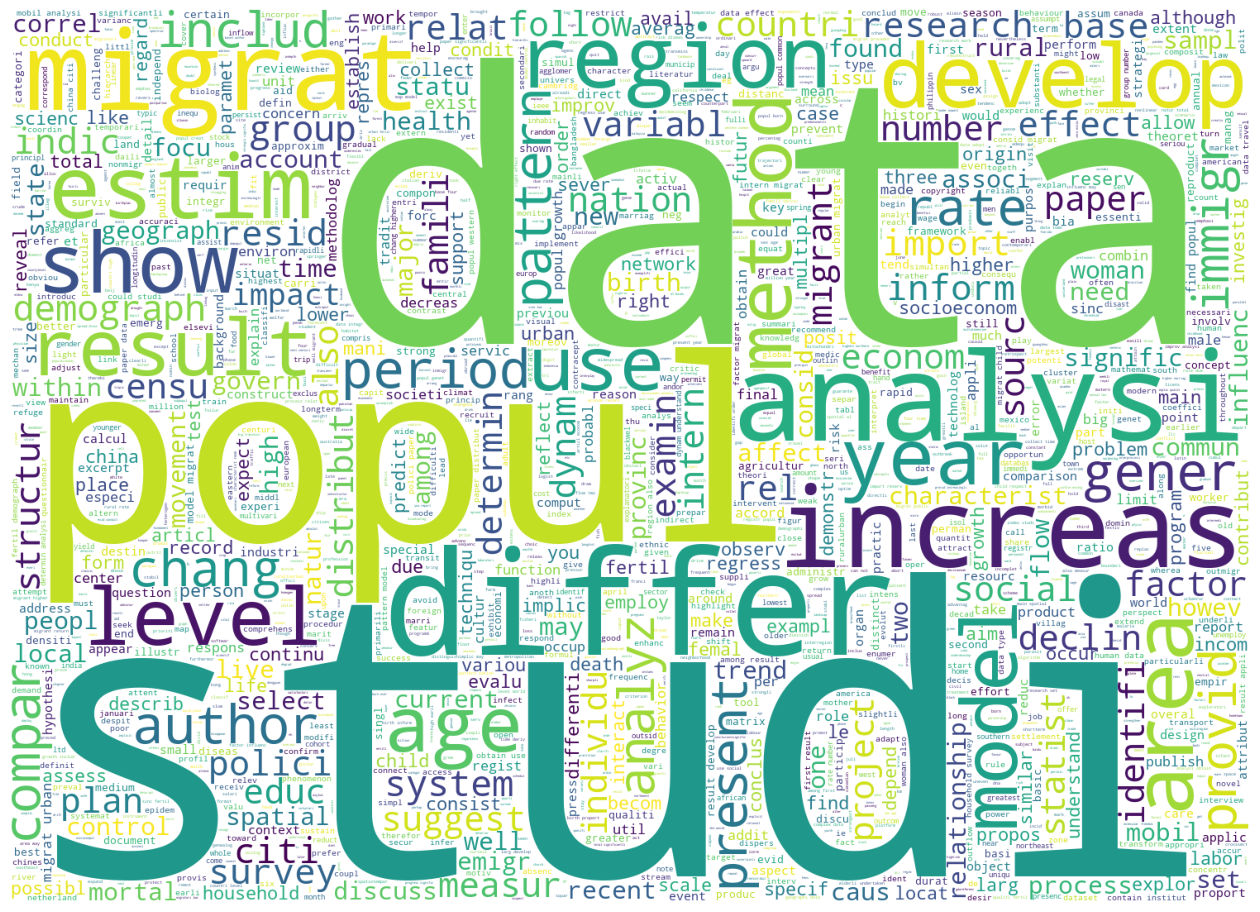

In [62]:
# Create Wordcloud with removed stopwords
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=stopwords_abs,
                          height=1080).generate(" ".join(df.clean_Abstract))
plt.title("Most common abstract words(without stopwords and some additional terms)", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

# **3. Feature Engineering**

Feature engineering or representing text is a crucial step in the Natural Language Processing (NLP) pipeline. It involves transforming raw text into a format that can be easily understood by machine learning algorithms. Here's a brief overview of some common techniques

- Vectorizing Data: Bag-Of-Words
- Vectorizing Data: N-Grams
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Part of Speech (POS) tagging

-**Vectorizing Data:** Bag-Of-Words (BoW)
The Bag-of-Words model is one of the simplest ways to represent text data numerically. It involves converting each document into a vector that represents the frequency of each unique word in a predefined vocabulary. The model disregards the order of words, focusing solely on their occurrence.

-**Vectorizing Data: N-Grams**
N-Grams are contiguous sequences of 'n' items from a given text. Unlike BoW, which considers each word independently, N-Grams capture some context by considering sequences of words. For example, bigrams (2-grams) consider pairs of consecutive words, thereby capturing some of the text's local structure.

-**Term Frequency-Inverse Document Frequency (TF-IDF)**
TF-IDF is an extension of the BoW model that takes into account not just the frequency of a word in a particular document (Term Frequency), but also how unique the word is across all documents (Inverse Document Frequency). This helps in giving more weight to words that are more informative.

-**Part of Speech (POS) Tagging**
POS tagging involves identifying the grammatical categories (such as nouns, verbs, adjectives, etc.) of the words in a sentence. This can be useful in understanding the syntactic and semantic roles of words in the text, and can serve as an additional feature for text classification tasks

## **Bag-Of-Words**

In [24]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'clean_Abstract' column
X = vectorizer.fit_transform(df['clean_Abstract'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     aalg  abat  abc  abil  abject  abl  abolish  abordé  aborigin  abort  \
0       0     0    0     0       0    0        0       0         0      0   
1       0     0    0     0       0    0        0       0         0      0   
2       0     0    0     0       0    0        0       0         0      0   
3       0     0    0     0       0    0        0       0         0      0   
4       0     0    0     1       0    0        0       0         0      0   
..    ...   ...  ...   ...     ...  ...      ...     ...       ...    ...   
316     0     0    0     0       0    0        0       0         0      0   
317     0     0    0     0       0    0        0       0         0      0   
318     0     0    0     0       0    0        0       0         0      0   
319     0     0    0     0       0    0        0       0         0      0   
320     0     0    0     0       0    0        0       0         0      0   

     ...  zhu  zhuhai  zimbabw  zone  zoom  zooplankton  éloigné  établi  \

*Bar Plot for Most Common BoW*

You can use a bar plot to visualize the most common BoW in the corpus.

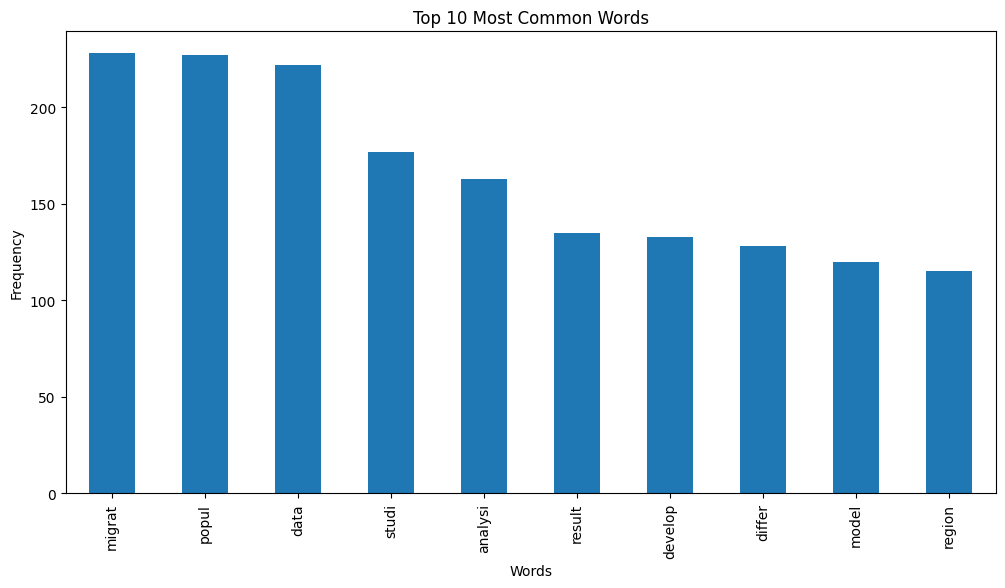

In [25]:
# Sum up the counts of each word
sum_words = bow_df.sum(axis=0)

# Sort and select top 10 words
sorted_words = sum_words.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_words.plot(kind='bar')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the BoW

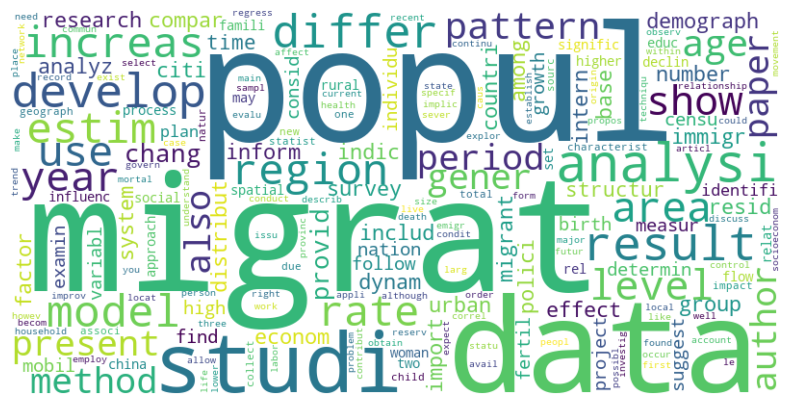

In [26]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_words)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **N-Grams (2 bigram)**

In [27]:
# Initialize CountVectorizer with bigram parameter
vectorizer = CountVectorizer(ngram_range=(2, 2))  # For bigrams

# Fit and transform the cleaned abstracts
X = vectorizer.fit_transform(df['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(ngram_df.sample(5))

     aalg count  abat fortun  abc accur  abil addit  abil cge  abil field  \
2             0            0          0           0         0           0   
115           0            0          0           0         0           0   
237           0            0          0           0         0           0   
282           0            0          0           0         0           0   
57            0            0          0           0         0           0   

     abil pearl  abil set  abject public  abl dataset  ...  zone pilot  \
2             0         0              0            0  ...           0   
115           0         0              0            0  ...           0   
237           0         0              0            0  ...           1   
282           0         0              0            0  ...           0   
57            0         0              0            0  ...           0   

     zone record  zone unit  zoom inout  zoom phenomenolog  \
2              0          0   

*Bar Plot for Most Common N-Grams*

You can use a bar plot to visualize the most common N-grams in the corpus.

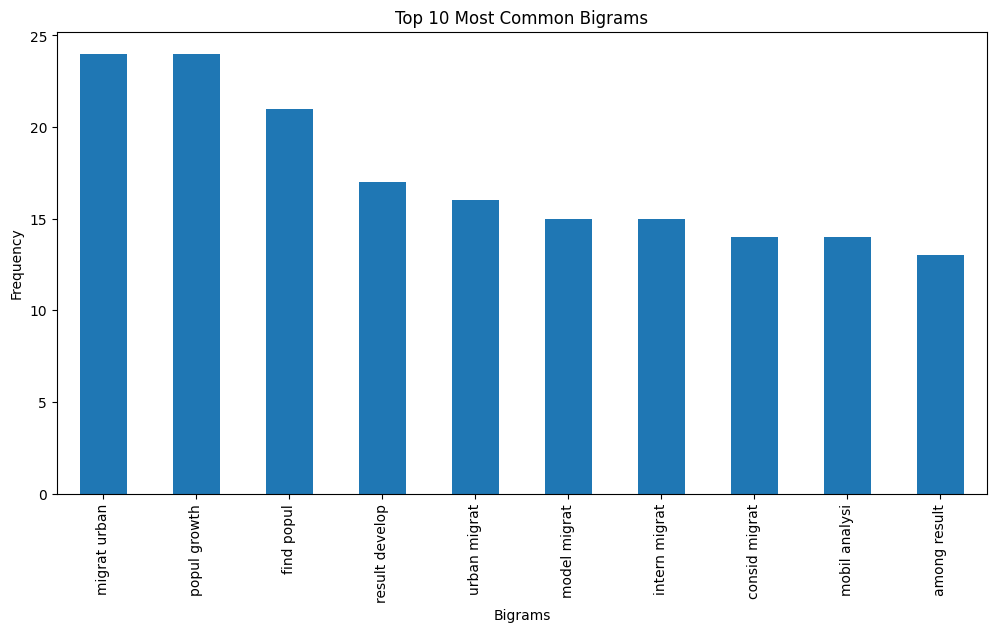

In [28]:
# Sum up the counts of each bigram
sum_bigrams = ngram_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_bigrams = sum_bigrams.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_bigrams.plot(kind='bar')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the N-grams, although it's generally better for unigrams.

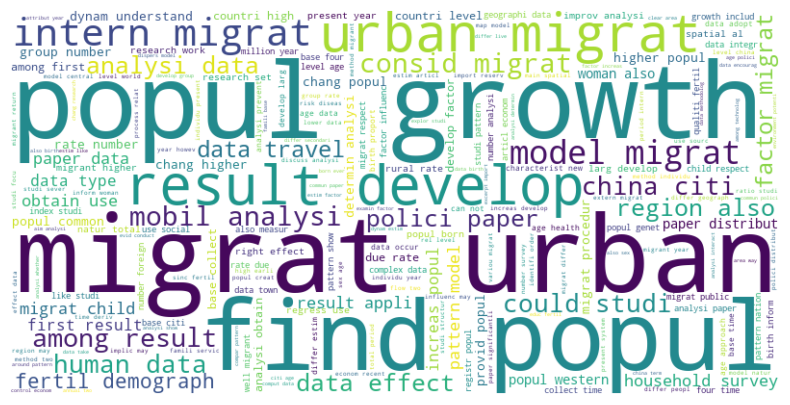

In [29]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_bigrams)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Term Frequency-Inverse Document Frequency (TF-IDF)**

In [30]:
# Sample DataFrame
df = pd.DataFrame({
    'clean_Abstract': ['along use continu analyz', 'languag result help present', 'use fulfil highlight face']
})

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


      along    analyz   continu      face    fulfil  help  highlight  languag  \
0  0.528635  0.528635  0.528635  0.000000  0.000000   0.0   0.000000      0.0   
1  0.000000  0.000000  0.000000  0.000000  0.000000   0.5   0.000000      0.5   
2  0.000000  0.000000  0.000000  0.528635  0.528635   0.0   0.528635      0.0   

   present  result      use  
0      0.0     0.0  0.40204  
1      0.5     0.5  0.00000  
2      0.0     0.0  0.40204  


*Bar Plot for Most Common TF-IDF*

You can use a bar plot to visualize the most common TF-IDF in the corpus.

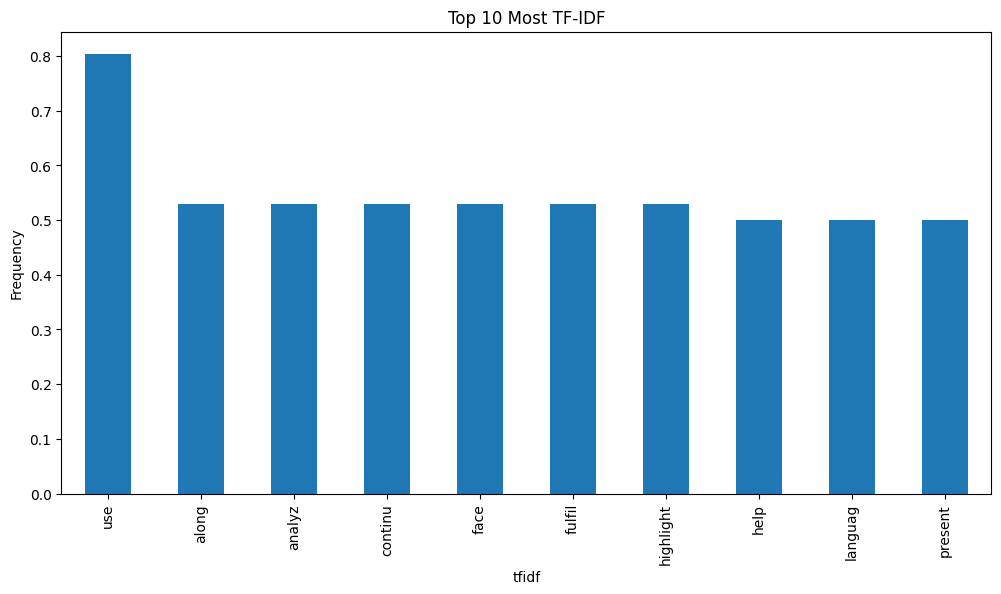

In [31]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the TF-IDF

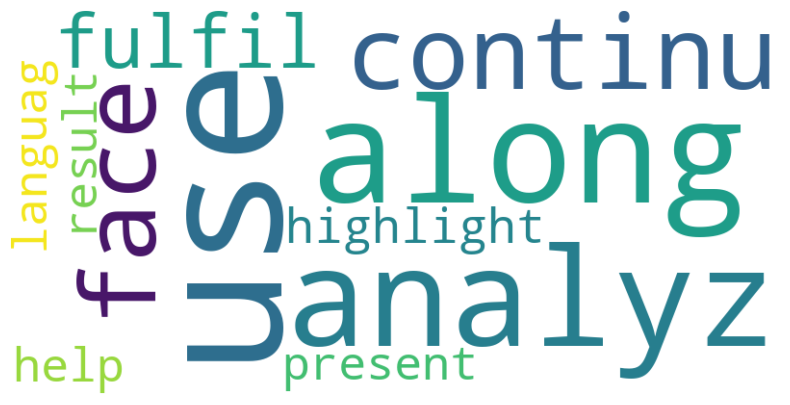

In [32]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_tfidf)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Part of Speech (POS) Tagging**

In [33]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
df['POS_Tagged_Abstract'] = df['clean_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
print(df[['clean_Abstract', 'POS_Tagged_Abstract']].head())


                clean_Abstract  \
0     along use continu analyz   
1  languag result help present   
2    use fulfil highlight face   

                                 POS_Tagged_Abstract  
0  [(along, IN), (use, NN), (continu, NN), (analy...  
1  [(languag, NN), (result, NN), (help, NN), (pre...  
2  [(use, NN), (fulfil, NN), (highlight, VBD), (f...  


**Frequency Distribution of POS Tags**

Bar chart to show the frequency distribution of different POS tags across all abstracts.

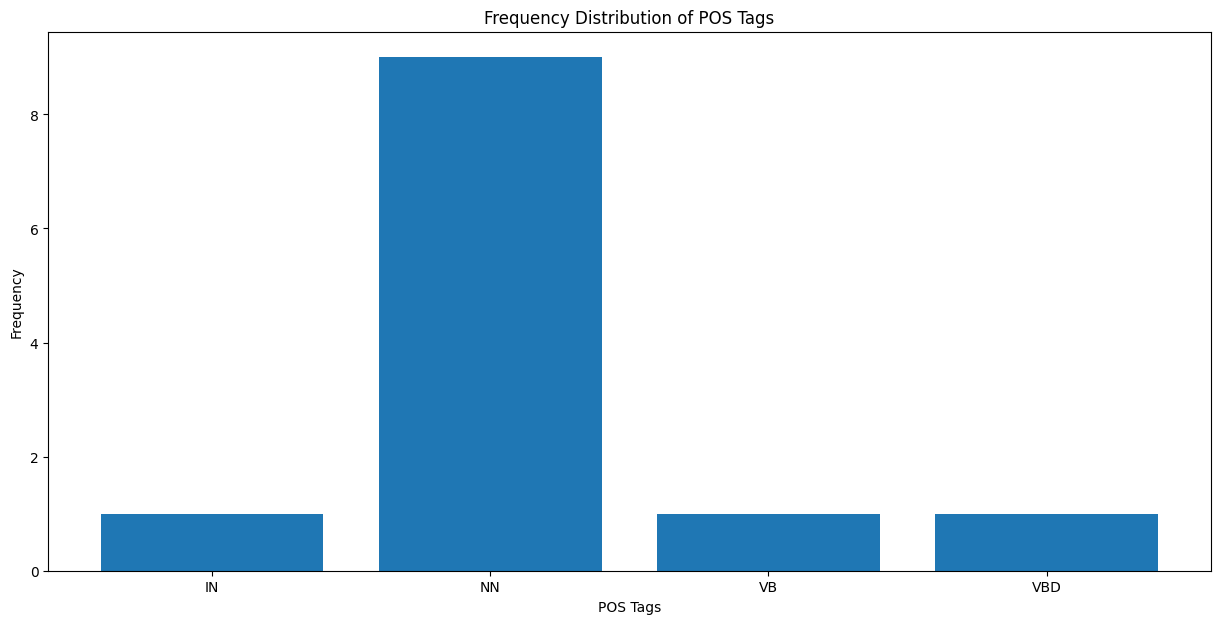

In [34]:
# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(df['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of POS Tags')
plt.show()


In [35]:
# Display the first few rows of the DataFrame
df[['clean_Abstract', 'POS_Tagged_Abstract']].head()


clean_Abstract  \
0     along use continu analyz   
1  languag result help present   
2    use fulfil highlight face   

                                 POS_Tagged_Abstract  
0  [(along, IN), (use, NN), (continu, NN), (analy...  
1  [(languag, NN), (result, NN), (help, NN), (pre...  
2  [(use, NN), (fulfil, NN), (highlight, VBD), (f...

**Pie Chart for Overall Tag Distribution**

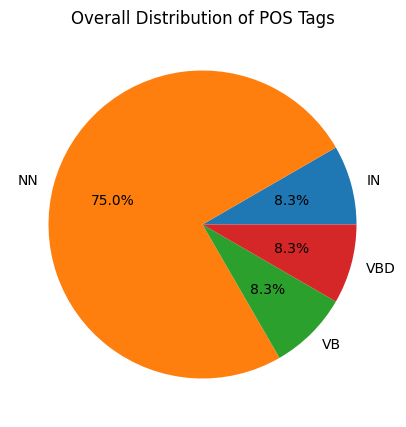

In [36]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()
